In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
from wordcloud import WordCloud
mpl.rcParams['font.sans-serif']=['SimHei']
import csv
import math

In [2]:
data = pd.read_csv('./data/data.csv')

data.head()

,accidenttime,accidentaddr,driverfault,driverresponsibility,sex,platenumber,carcolor,jxmc,cclzrq,clpp,...,brith_year,age_year,accident_month,accident_hour,date,日期,天气状况,气温,风力风向,freq
0,2015-02-04 07:20:00,白金大道,1、追尾的,负全部责任,1,贵A24876,蓝,鑫鑫驾校,2006-11-30 00:00:00,华神牌,...,1969,46,2,7,2015-02-04,2015-02-04,小到中雨,4℃ / 0℃,东北风 ≤3级 /东北风 ≤3级,625
1,2015-02-02 19:30:00,小河清水江路,7、未按规定让行的,负全部责任,1,贵AHG599,白色,（南明区）阳光驾驶培训有限公司,2005-02-07 00:00:00,别克牌,...,1973,42,2,19,2015-02-02,2015-02-02,小到中雨,7℃ / 3℃,南风 ≤3级 /东南风 ≤3级,625
2,2015-02-03 12:30:00,机场路,8、依法应负全责的其他情形,负全部责任,1,贵AA454L,白色,新天驾校,2014-02-11 00:00:00,东风雪铁龙牌,...,1964,51,2,12,2015-02-03,2015-02-03,小到中雨,6℃ / 1℃,东北风 ≤3级 /东北风 ≤3级,625
3,2015-02-06 09:30:00,西二环,7、未按规定让行的,负全部责任,1,贵AKK214,黑,自培,2004-12-30 00:00:00,佳乐,...,1971,44,2,9,2015-02-06,2015-02-06,小到中雨,9℃ / 2℃,南风 ≤3级 /南风 ≤3级,625
4,2015-02-07 11:00:00,孟关,3、倒车的,负全部责任,1,贵AN1836,黑,-1,1977-11-14 00:00:00,豪爵牌,...,1956,59,2,11,2015-02-07,2015-02-07,晴,8℃ / 3℃,东北风 ≤3级 /东北风 ≤3级,625


In [3]:
data[['drive_year','age_year','freq']].describe()

,drive_year,age_year,freq
count,14285.000000,14285.000000,14285.000000
mean,7.719776,37.668043,2293.402660
std,6.560583,9.811675,2454.487346
min,0.000000,19.000000,1.000000
25%,2.000000,30.000000,222.000000
50%,7.000000,37.000000,1446.000000
75%,11.000000,44.000000,4021.000000
max,49.000000,76.000000,6328.000000


In [4]:
def MinMaxScale(value):
    new_value=(value-value.min())/(value.max()-value.min())
    return new_value

In [5]:
drive_year=MinMaxScale(data['drive_year'])
age_year=MinMaxScale(data['age_year'])
freq=MinMaxScale(data['freq'])

In [7]:
kmeans_data=pd.concat([drive_year,age_year,freq],axis=1)
kmeans_data


,drive_year,age_year,freq
0,0.163265,0.473684,0.098625
1,0.183673,0.403509,0.098625
2,0.000000,0.561404,0.098625
3,0.204082,0.438596,0.098625
4,0.755102,0.701754,0.098625
...,...,...,...
14280,0.000000,0.122807,0.000000
14281,0.367347,0.807018,0.000000
14282,0.224490,0.438596,0.000474
14283,0.142857,0.298246,0.000000


In [10]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
siScore=[]
for i in range(3,10):
    model=KMeans(n_clusters=i,random_state=123).fit(kmeans_data)
    
    score = silhouette_score(kmeans_data,model.labels_)
    siScore.append(score)

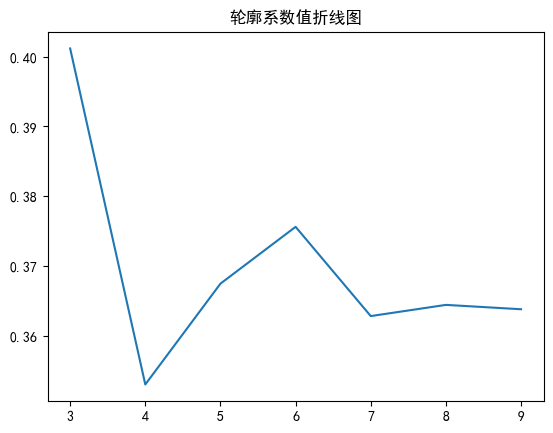

In [11]:
plt.plot(range(3,10),siScore)
plt.title('轮廓系数值折线图')
plt.show()

In [12]:
model=KMeans(n_clusters=3,random_state=123).fit(kmeans_data)

In [13]:
r1=pd.Series(model.labels_).value_counts()
r1

2    5635
0    4391
1    4259
Name: count, dtype: int64

In [14]:
r2=pd.DataFrame(model.cluster_centers_)
r2.columns=['驾龄','年龄','违法次数']
r2

,驾龄,年龄,违法次数
0,0.207306,0.447443,0.138153
1,0.212424,0.383234,0.924331
2,0.077708,0.192750,0.112309


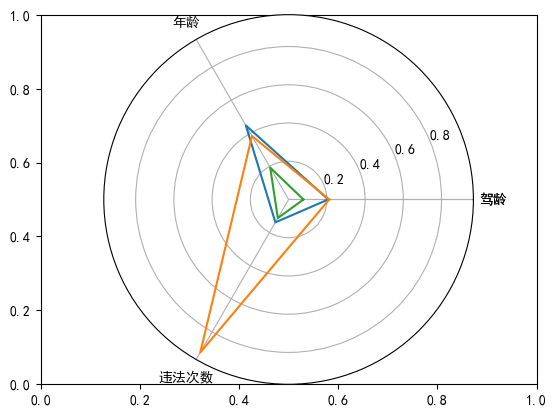

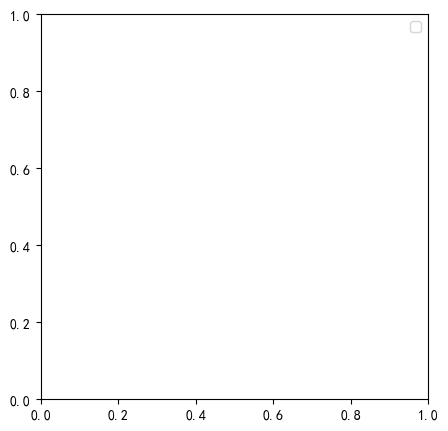

In [29]:
features=r2.columns
n=len(features)

angles=np.linspace(0,2*np.pi,n,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
result=pd.concat([r2,r2['驾龄']],axis=1)
centers=np.array(result)


fig, ax = plt.subplots()
plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1,polar=True)
for i in range(n):
    ax.plot(angles,centers[i])

ax.set_thetagrids(angles * 180/np.pi,list(features) + [features[0]])
plt.legend(r2.index)
plt.show()

In [32]:
angles.shape

(4,)

In [33]:
features.shape

(3,)

C:\Users\86139\AppData\Local\Temp\ipykernel_23284\1331706340.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(111, polar=True)


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

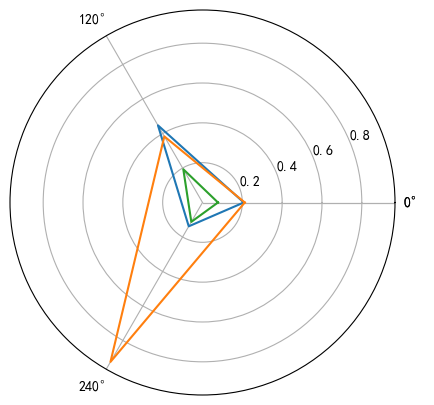

In [23]:
features=r2.columns.values
n=len(features)

angles=np.linspace(0,2*np.pi,n,endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
result=pd.concat([r2,r2['驾龄']],axis=1)
centers=np.array(result)

fig, ax = plt.subplots(figsize=(5,5))

ax=plt.subplot(111, polar=True)
for i in range(n):
    ax.plot(angles,centers[i])

ax.set_thetagrids(angles*180/np.pi,features)
plt.legend(r2.index)
plt.show()

C:\Users\86139\AppData\Local\Temp\ipykernel_23284\965455575.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


ValueError: x and y must have same first dimension, but have shapes (3,) and (4,)

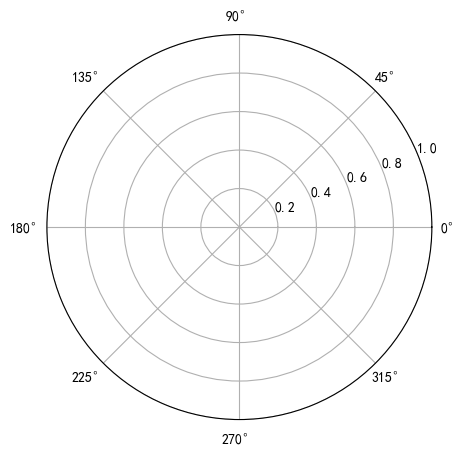

In [25]:
features = r2.columns.values
n = len(features)

angles = np.linspace(0, 2*np.pi, n, endpoint=False)
result = pd.concat([r2, r2['驾龄']], axis=1)
centers = np.array(result)

fig, ax = plt.subplots(figsize=(5,5))
ax = plt.subplot(111, polar=True)

for i in range(n):
    ax.plot(angles, centers[i])

ax.set_thetagrids(angles * 180/np.pi,list(features) + [features[0]]),x)
plt.show()